<a href="https://colab.research.google.com/github/Pavel184/Neural_networks/blob/Homework_lesson_2/Homework_lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework_lesson_2

# Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.

In [1]:
# Код нейронной сети в Keras!
###############################
import numpy as np
import pandas as pd
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score


In [2]:

(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# можно брать mnist из специальной библиотеки
#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()

# приведем изображение к диапазону (-1,1).
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

Размер набора входных данных для обучения 

In [3]:
dim = train_images.shape[1]

Превратим выходы в векторые (OHE в keras - from keras.utils import to_categorical)

In [4]:
y_t = to_categorical( train_labels)
y_tt = to_categorical(test_labels)

In [5]:
numb_neur = [32, 64, 128, 256, 512, 1024]
for numb in numb_neur:
  # Build the model.
  model = Sequential([
    Dense(numb, activation='tanh', input_shape=(dim,)),
    #Dense(numb, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
    #Dense(numb, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

  # Compile the model.
  model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )
  # Train the model.
  model.fit(  
    train_images[:,:],

    y_t[:,:],
    epochs=15,
    verbose = 0,
    batch_size=32, validation_split=0.2
  )

  # Evaluate the model.
  metrics_test = model.evaluate( 
    test_images,
    y_tt,
    verbose = 0
  )
  metrics_train = model.evaluate( 
   train_images,
   y_t,
   verbose = 0
 )
  print('train_loss = ' + str(metrics_train[0]) + ', train_accuracy = ' + str(metrics_train[1]) + ' test_loss = ' + str(metrics_test[0]) + ', test_accuracy = ' + str(metrics_test[1]) + ', number of neurons is ' + str(numb))

train_loss = 0.30149203538894653, train_accuracy = 0.8892666697502136 test_loss = 0.41690728068351746, test_accuracy = 0.854200005531311, number of neurons is 32
train_loss = 0.2690584659576416, train_accuracy = 0.9030333161354065 test_loss = 0.38378283381462097, test_accuracy = 0.8652999997138977, number of neurons is 64
train_loss = 0.25035780668258667, train_accuracy = 0.9089000225067139 test_loss = 0.36865749955177307, test_accuracy = 0.8736000061035156, number of neurons is 128
train_loss = 0.2583199441432953, train_accuracy = 0.9058666825294495 test_loss = 0.38071882724761963, test_accuracy = 0.8695999979972839, number of neurons is 256
train_loss = 0.2753409445285797, train_accuracy = 0.9014166593551636 test_loss = 0.4002513885498047, test_accuracy = 0.8640999794006348, number of neurons is 512
train_loss = 0.30553072690963745, train_accuracy = 0.8896333575248718 test_loss = 0.4358293116092682, test_accuracy = 0.8615000247955322, number of neurons is 1024


train_loss = 0.30149203538894653, train_accuracy = 0.8892666697502136 test_loss = 0.41690728068351746, test_accuracy = 0.854200005531311, number of neurons is 32

train_loss = 0.2690584659576416, train_accuracy = 0.9030333161354065 test_loss = 0.38378283381462097, test_accuracy = 0.8652999997138977, number of neurons is 64

train_loss = 0.25035780668258667, train_accuracy = 0.9089000225067139 test_loss = 0.36865749955177307, test_accuracy = 0.8736000061035156, number of neurons is 128

train_loss = 0.2583199441432953, train_accuracy = 0.9058666825294495 test_loss = 0.38071882724761963, test_accuracy = 0.8695999979972839, number of neurons is 256

train_loss = 0.2753409445285797, train_accuracy = 0.9014166593551636 test_loss = 0.4002513885498047, test_accuracy = 0.8640999794006348, number of neurons is 512

train_loss = 0.30553072690963745, train_accuracy = 0.8896333575248718 test_loss = 0.4358293116092682, test_accuracy = 0.8615000247955322, number of neurons is 1024

Из примера выше видно, что при увеличении числа нейронов 2-х слойной сети качество модели растёт до определённого значения и потом начинает снижаться

In [6]:
models_results = {
    'approach': [],
    'loss_train': [],
    'accuracy_train': [],
    'loss_test': [],
    'accuracy_test': []
}


In [7]:
model = Sequential([
  Dense(512, activation='tanh', input_shape=(dim,)), 
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.summary()

# Train the model.
model.fit(  
  train_images[:,:],

  y_t[:,:],
  epochs=15,
  verbose = 0,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
metrics_train = model.evaluate( 
  train_images,
  y_t,
  verbose = 0
)

metrics_test = model.evaluate( 
  test_images,
  y_tt,
  verbose = 0
)


models_results['approach'].append('2 layers')
models_results['loss_train'].append(metrics_train[0])
models_results['accuracy_train'].append(metrics_train[1])
models_results['loss_test'].append(metrics_test[0])
models_results['accuracy_test'].append(metrics_test[1])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = Sequential([
  Dense(354, activation='tanh', input_shape=(dim,)), #784
  Dense(354, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )
model.summary()

# Train the model.
model.fit(  
  train_images[:,:],

  y_t[:,:],
  epochs=15,
  verbose = 0,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
metrics_train = model.evaluate( 
  train_images,
  y_t,
  verbose = 0
)

metrics_test = model.evaluate( 
  test_images,
  y_tt,
  verbose = 0
)


models_results['approach'].append('3 layers')
models_results['loss_train'].append(metrics_train[0])
models_results['accuracy_train'].append(metrics_train[1])
models_results['loss_test'].append(metrics_test[0])
models_results['accuracy_test'].append(metrics_test[1])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 354)               277890    
_________________________________________________________________
dense_15 (Dense)             (None, 354)               125670    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                3550      
Total params: 407,110
Trainable params: 407,110
Non-trainable params: 0
_________________________________________________________________


In [9]:
numb_layers = 5
model = Sequential(name='my_model')
model.add(Dense(259, activation='tanh', input_shape=(dim,)))
while numb_layers-2 > 0:
  model.add(Dense(259, activation='tanh'))
  numb_layers -= 1
model.add(Dense( 10, activation='softmax'))
# Compile the model.
model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
model.summary()

# Train the model.
model.fit(  
  train_images[:,:],

  y_t[:,:],
  epochs=15,
  verbose = 0,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
metrics_train = model.evaluate( 
  train_images,
  y_t,
  verbose = 0
)

metrics_test = model.evaluate( 
  test_images,
  y_tt,
  verbose = 0
)


models_results['approach'].append('5 layers')
models_results['loss_train'].append(metrics_train[0])
models_results['accuracy_train'].append(metrics_train[1])
models_results['loss_test'].append(metrics_test[0])
models_results['accuracy_test'].append(metrics_test[1])

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 259)               203315    
_________________________________________________________________
dense_18 (Dense)             (None, 259)               67340     
_________________________________________________________________
dense_19 (Dense)             (None, 259)               67340     
_________________________________________________________________
dense_20 (Dense)             (None, 259)               67340     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2600      
Total params: 407,935
Trainable params: 407,935
Non-trainable params: 0
_________________________________________________________________


In [10]:
numb_layers = 10
model = Sequential(name='my_model')
model.add(Dense(181, activation='tanh', input_shape=(dim,)))
while numb_layers-2 > 0:
  model.add(Dense(181, activation='tanh'))
  numb_layers -= 1
model.add(Dense( 10, activation='softmax'))
# Compile the model.
model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
model.summary()

# Train the model.
model.fit(  
  train_images[:,:],

  y_t[:,:],
  epochs=15,
  verbose = 0,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
metrics_train = model.evaluate( 
  train_images,
  y_t,
  verbose = 0
)

metrics_test = model.evaluate( 
  test_images,
  y_tt,
  verbose = 0
)


models_results['approach'].append('10 layers')
models_results['loss_train'].append(metrics_train[0])
models_results['accuracy_train'].append(metrics_train[1])
models_results['loss_test'].append(metrics_test[0])
models_results['accuracy_test'].append(metrics_test[1])

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 181)               142085    
_________________________________________________________________
dense_23 (Dense)             (None, 181)               32942     
_________________________________________________________________
dense_24 (Dense)             (None, 181)               32942     
_________________________________________________________________
dense_25 (Dense)             (None, 181)               32942     
_________________________________________________________________
dense_26 (Dense)             (None, 181)               32942     
_________________________________________________________________
dense_27 (Dense)             (None, 181)               32942     
_________________________________________________________________
dense_28 (Dense)             (None, 181)               329

In [11]:
pd.DataFrame(data=models_results).sort_values('accuracy_test', ascending=False)

,approach,loss_train,accuracy_train,loss_test,accuracy_test
0,2 layers,0.307800,0.891167,0.433272,0.8567
1,3 layers,0.312568,0.884783,0.417196,0.8556
2,5 layers,0.332757,0.880583,0.409345,0.8534
3,10 layers,0.425103,0.850000,0.479372,0.8336


Из примера выше видно, что с ростом слоёв при сохранении числа обучаемых параметров качество модели снижается

# 2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [12]:
modeli_results = {
    'approach': [],
    'loss_train': [],
    'accuracy_train': [],
    'loss_test': [],
    'accuracy_test': []
}

# создаем модель model
model = Sequential([
                      Dense( 64, activation='tanh', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(64, activation='tanh', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # проводим обучение модели 
  modeli.fit(
      train_images,
      to_categorical(train_labels),
      epochs=epochs,
      batch_size=32, validation_split=0.2, verbose = 0
      )
  # Evaluate the model.
  metrics_train = modeli.evaluate( 
    train_images,
    y_t,
    verbose = 0
  )

  metrics_test = modeli.evaluate( 
    test_images,
    y_tt,
    verbose = 0
  )


  modeli_results['approach'].append(i_optim)
  modeli_results['loss_train'].append(metrics_train[0])
  modeli_results['accuracy_train'].append(metrics_train[1])
  modeli_results['loss_test'].append(metrics_test[0])
  modeli_results['accuracy_test'].append(metrics_test[1])
    


<Figure size 1152x504 with 0 Axes>

In [13]:
pd.DataFrame(data=modeli_results).sort_values('accuracy_test', ascending=False)

,approach,loss_train,accuracy_train,loss_test,accuracy_test
3,NAdam,0.245741,0.910800,0.377040,0.8732
0,SGD,0.287096,0.897417,0.364342,0.8700
2,adam,0.263231,0.903983,0.385358,0.8680
1,RMSProp,0.248266,0.911117,0.391987,0.8678


Из примера выше видно, что accuracy незначительно выше при NAdam. Но при перезапуске сети рйтинг может поменяться, это значит, что на тесте все оптимизаторы примерно одинаковы

# 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

Качество модели помог улучшить подбор гиперпараметров - числа нейронов, так же числа слоёв. Выбор ф-ции потерь тоже внёс свой вклад в улучшение модели

# 4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [14]:
y_pred = modeli.predict(test_images)
y_pred_class = np.argmax(y_pred,axis=1)

conf_matrix = multilabel_confusion_matrix(test_labels, y_pred_class)

In [15]:
labels = ["".join(str(i)) for i in ['T-shirt/top - 0','Trouser - 1','Pullover - 2','Dress - 3','Coat - 4','Sandal - 5','Shirt - 6','Sneaker - 7','Bag - 8','Ankle boot - 9']]

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Conf matr for " + class_label)

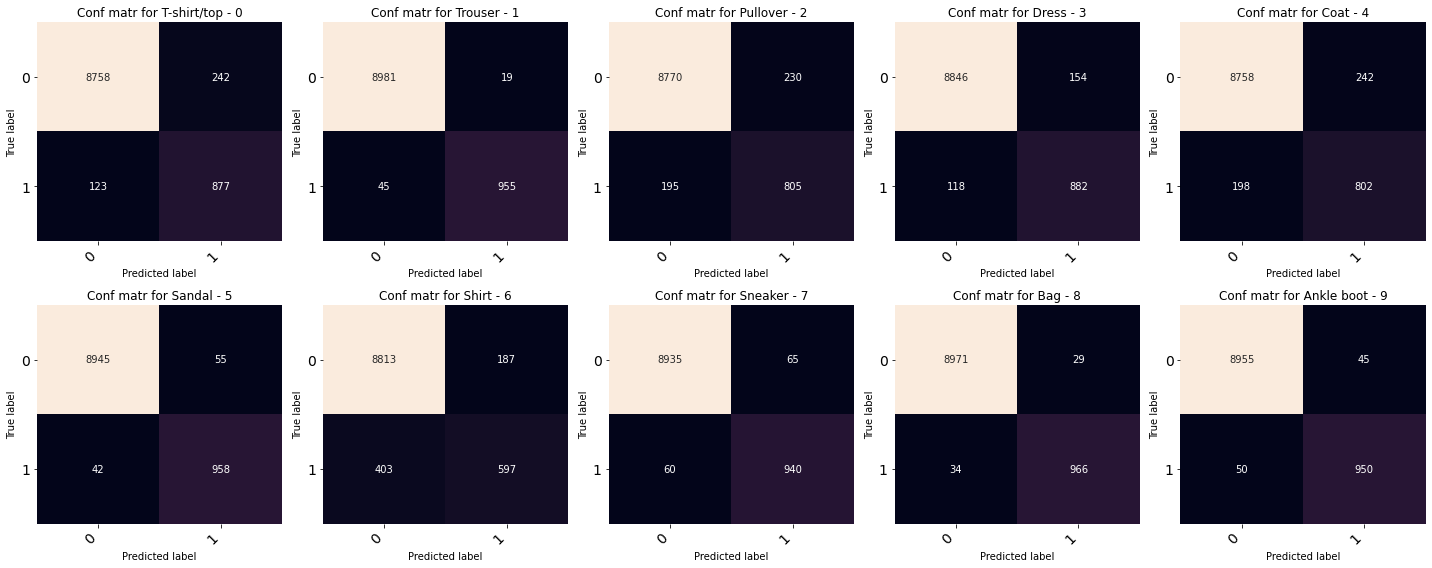

In [16]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
    
for axes, cfs_matrix, label in zip(ax.flatten(), conf_matrix, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["0", "1"])
    
fig.tight_layout()
plt.show()

In [17]:
# Вывод метрик по каждому классу
class_names = ['T-shirt/top - 0','Trouser - 1','Pullover - 2','Dress - 3','Coat - 4','Sandal - 5','Shirt - 6','Sneaker - 7','Bag - 8','Ankle boot - 9']
print(classification_report(test_labels, y_pred_class, target_names=class_names))

                 precision    recall  f1-score   support

T-shirt/top - 0       0.78      0.88      0.83      1000
    Trouser - 1       0.98      0.95      0.97      1000
   Pullover - 2       0.78      0.81      0.79      1000
      Dress - 3       0.85      0.88      0.87      1000
       Coat - 4       0.77      0.80      0.78      1000
     Sandal - 5       0.95      0.96      0.95      1000
      Shirt - 6       0.76      0.60      0.67      1000
    Sneaker - 7       0.94      0.94      0.94      1000
        Bag - 8       0.97      0.97      0.97      1000
 Ankle boot - 9       0.95      0.95      0.95      1000

       accuracy                           0.87     10000
      macro avg       0.87      0.87      0.87     10000
   weighted avg       0.87      0.87      0.87     10000



Посмотрим на результат предсказаний  (inference) для обученной модели

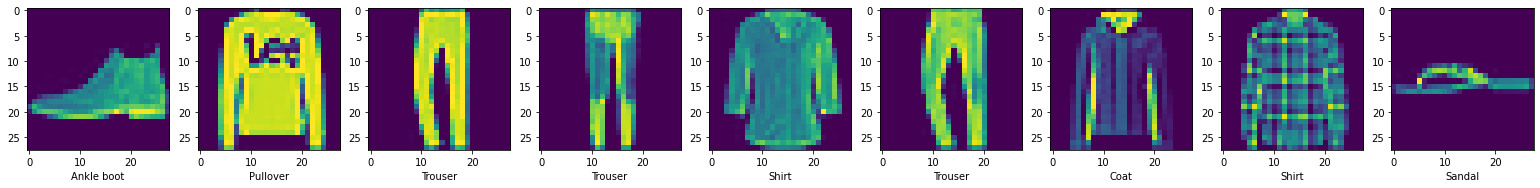

In [18]:
N = 9
y_pred = modeli.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class1 = np.array(y_pred_class, dtype=str)
y_pred_class1[y_pred_class1 == '0'] = str('T-shirt/top')
y_pred_class1[y_pred_class1 == '1'] = str('Trouser')
y_pred_class1[y_pred_class1 == '2'] = str('Pullover')
y_pred_class1[y_pred_class1 == '3'] = str('Dress')
y_pred_class1[y_pred_class1 == '4'] = str('Coat')
y_pred_class1[y_pred_class1 == '5'] = str('Sandal')
y_pred_class1[y_pred_class1 == '6'] = str('Shirt')
y_pred_class1[y_pred_class1 == '7'] = str('Sneaker')
y_pred_class1[y_pred_class1 == '8'] = str('Bag')
y_pred_class1[y_pred_class1 == '9'] = str('Ankle boot')
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class1[i]))
plt.show()  

Вывод: результаты отличаются для разных классов. Вероятно из-за того, что некоторые классы схожи между собой и их классификация менее точна. К примеру классы 'Trouser - 1', 'Bag - 8' не имеют схожих классов и их классификация более точна.